# Data Augmentation (for Convolutional Neural Network Training Purpose)

We're going to do three different combinations of augmentations:

1. Overlaying transparent image, Flipping horizontally, and Rotating image by 257 degree.
2. Information Loss iamge, Flipping vertically, and Rotating image by 36 degree.
3. Color shifting image, Flipping horizontally and vertically, and Rotating image by 124 degree.

Libraries and Image Loading

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import tensorflow as tf

#from PIL import Image
import cv2

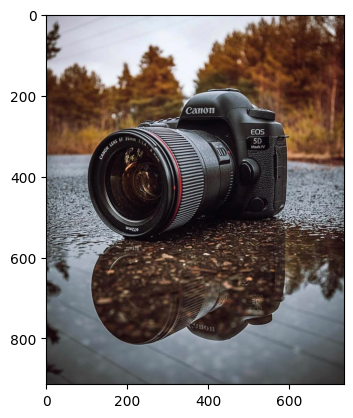

In [ ]:
#img = Image.open('Camera_for_preprocessing.jpg')
img = cv2.imread('picture_samples/Camera_for_preprocessing.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGBA) #Convert the color
_ = plt.imshow(img)

1. Overlaying transparent image, Flipping horizontally, and Rotating image by 257 degree.

In [83]:
import random 

In [89]:
img = cv2.imread('picture_samples/Camera_for_preprocessing.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Convert the color
print(img.shape)

(914, 736, 3)


In [94]:
overlaying = cv2.imread('picture_samples/overlaying.jpg')
overlaying = cv2.cvtColor(overlaying, cv2.COLOR_BGR2RGB)
print(overlaying.shape)

(2664, 3997, 3)


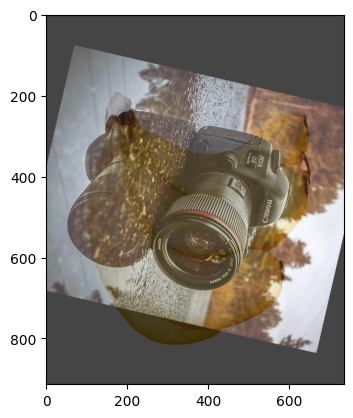

In [97]:
h_flip = cv2.flip(img, 1) #horizontal flip
(h, w) = h_flip.shape[:2]
center = (w//2 , h//2)

angle = 257
scale = random.uniform(0.8, 2)
M = cv2.getRotationMatrix2D(center, angle, scale)

rotated = cv2.warpAffine(h_flip, M, (w, h))

def overlay_with_opacity(background, overlay, alpha_range=(0.1, 0.3)):
    """
    background: augmented image (H, W, 3)
    overlay: background/texture image (any size, 3 channels)
    alpha_range: tuple defining opacity range
    """
    bg = background.copy()

    # Resize overlay to match background
    overlay = cv2.resize(overlay, (bg.shape[1], bg.shape[0]))

    # Random opacity
    alpha = random.uniform(*alpha_range)

    # Alpha blending
    blended = cv2.addWeighted(bg, 1 - alpha, overlay, alpha, 0)
    return blended

overlay_img = overlay_with_opacity(rotated, overlaying)

_ = plt.imshow(overlay_img)
#overlay = cv2.imread('background.jpg', -1) # Overlaying Transparent Image

2. Information Loss image, Flipping vertically, and Rotating image by 36 degree.

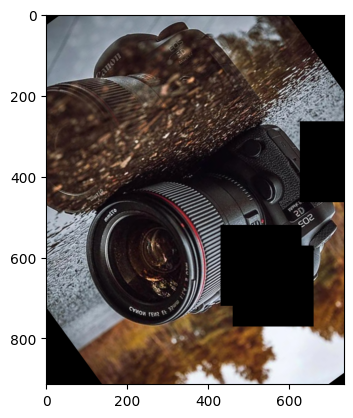

In [64]:
h_flip = cv2.flip(img, 0) #vertical
(h, w) = h_flip.shape[:2]
center = (w//2 , h//2)

angle = 36
scale = random.uniform(0.8, 2)
M = cv2.getRotationMatrix2D(center, angle, scale)

rotated = cv2.warpAffine(h_flip, M, (w, h))

def block_mask(img, times, block_size=200):
    h, w = img.shape[:2]
    img = img.copy()

    for i in range(times):
        y = np.random.randint(0, h)
        x = np.random.randint(0, w)

        y1 = max(0, y - block_size // 2)
        y2 = min(h, y + block_size // 2)
        x1 = max(0, x - block_size // 2)
        x2 = min(w, x + block_size // 2)

        img[y1:y2, x1:x2] = 0

    return img

info_loss_img = block_mask(rotated, 3)

_ = plt.imshow(info_loss_img)

#overlay = cv2.imread('background.jpg', -1) # Overlaying Transparent Image

In [44]:
rotated.dtype == np.uint8

True

3. Color shifting image, Flipping horizontally and vertically, and Rotating image by 124 degree.

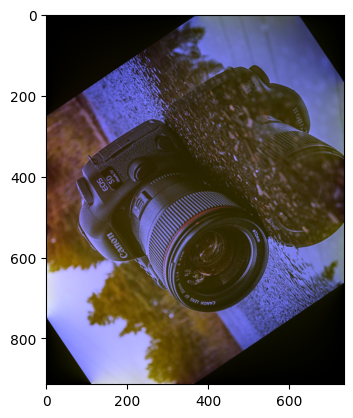

In [42]:
h_flip = cv2.flip(img, -1) #both
(h, w) = h_flip.shape[:2]
center = (w//2 , h//2)

angle = 124
scale = random.uniform(0.8, 2)
M = cv2.getRotationMatrix2D(center, angle, scale)

rotated = cv2.warpAffine(img, M, (w, h))

mask = np.ones(rotated.shape[:2], dtype=np.uint8) * 255

color_aug = cv2.colorChange(
    rotated,
    mask,
    red_mul=1.3,
    green_mul=0.5,
    blue_mul=0.5
)

plt.imshow(color_aug)